In [1]:
import pandas
import seaborn as sns

In [2]:
bioimg = pandas.read_csv('PubMed_Timeline_Results_by_Year_bioimaging.csv',header=1,
                         index_col='Year',dtype={'Count':'int'})
bioimg.rename(columns={'Count':'bioimaging_count'},inplace=True)
bioimg_a = pandas.read_csv('PubMed_Timeline_Results_by_Year_bioimage_analysis.csv',header=1,
                           index_col='Year',dtype={'Count':'int'})
bioimg_a.rename(columns={'Count':'bioimage_analysis_count'},inplace=True)
merged = pandas.concat([bioimg,bioimg_a],axis=1)
merged.drop([2023,1986,1988,1990],inplace=True)

In [3]:
merged['bioimaging']=merged['bioimaging_count']/merged['bioimaging_count'].max()
merged['bioimage analysis']=merged['bioimage_analysis_count']/merged['bioimage_analysis_count'].max()
melted=merged.melt(ignore_index=False,var_name='Query')
melted.reset_index(inplace=True)

In [4]:
melted

,Year,Query,value
0,2022,bioimaging_count,2587.000000
1,2021,bioimaging_count,2689.000000
2,2020,bioimaging_count,2292.000000
3,2019,bioimaging_count,2040.000000
4,2018,bioimaging_count,1808.000000
...,...,...,...
119,1996,bioimage analysis,0.014286
120,1995,bioimage analysis,0.028571
121,1994,bioimage analysis,0.042857
122,1993,bioimage analysis,0.014286


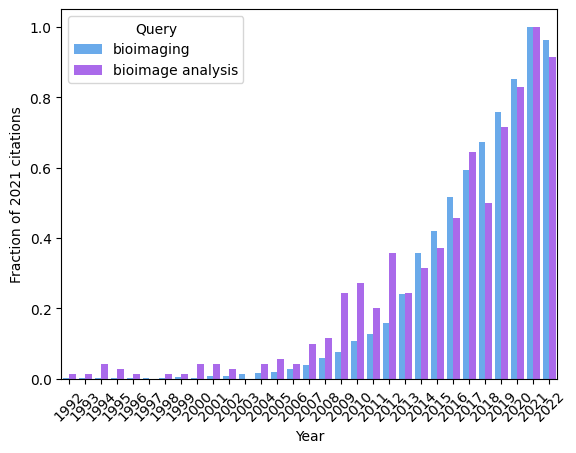

In [5]:
import matplotlib.pyplot as plt
sns.barplot(data=melted,x='Year',y='value',hue='Query',hue_order=['bioimaging','bioimage analysis'],palette='cool')
plt.xticks(rotation=45)
plt.ylabel('Fraction of 2021 citations')
plt.savefig('pubmed_citations.svg')
plt.savefig('pubmed_citations.png')